# AZ-204: Troubleshoot solutions by using Application Insights

In [1]:
import sys
sys.path.append('./../utils')
import ai

➡️ Answers generated using AI, and grounded in the learn module. Mistakes are possible. Check important info.

## Monitor app performance

In [2]:
%%learn
https://learn.microsoft.com/en-us/training/modules/monitor-app-performance/

https://learn.microsoft.com/en-us/training/modules/monitor-app-performance/1-introduction
https://learn.microsoft.com/en-us/training/modules/monitor-app-performance/2-application-insights-overview
https://learn.microsoft.com/en-us/training/modules/monitor-app-performance/3-logs-based-metrics
https://learn.microsoft.com/en-us/training/modules/monitor-app-performance/4-app-instrumentation
https://learn.microsoft.com/en-us/training/modules/monitor-app-performance/5-availability-tests
https://learn.microsoft.com/en-us/training/modules/monitor-app-performance/6-application-map


('',
 'https://learn.microsoft.com/en-us/training/modules/monitor-app-performance/\n')

In [3]:
%%question
Why is it important to monitor your application?

Monitoring your application is crucial because it helps maximize **availability** and **performance**. By monitoring, you can:

- **Proactively** understand how your application is performing.
- **Reactively** identify the root cause of incidents.
- Ensure **responsiveness** and **reliability** for users.
- Detect **anomalies** and failures using tools like **Application Insights**.
- Optimize resources and improve **user experience** by analyzing metrics like **request rates**, **response times**, and **failure rates**.

In [4]:
%%question
What is Application Insights and how is different from Azure Monitor?

**Application Insights** is a feature of **Azure Monitor** that provides **Application Performance Monitoring (APM)** capabilities. It focuses on monitoring application health and performance by collecting telemetry data, such as **request rates**, **response times**, and **exceptions**.

**Azure Monitor**, on the other hand, is a broader service that collects, analyzes, and acts on telemetry data from both applications and infrastructure. It encompasses various monitoring tools and services, including Application Insights, providing a comprehensive solution for monitoring the health and performance of your entire IT environment.

In [5]:
%%question
What is the underlying storage for Application Insights?

The underlying storage for **Application Insights** is based on **Azure Log Analytics**. It stores collected telemetry data, such as **metrics**, **logs**, and **trace events**, which can then be queried, analyzed, and visualized for monitoring and diagnostic purposes.

In [6]:
%%question
What is Azure Log Analytics also used for?

**Azure Log Analytics** is used for:

- **Aggregating and analyzing** log data from various sources, including **Azure resources**, **on-premises systems**, and **third-party cloud services**.
- Supporting **advanced querying** and **data visualization** to gain insights into operational health and performance.
- Enabling **alerting** and **automation** based on specific conditions detected in log data.
- Integrating with other Azure services for comprehensive **security** and **compliance** monitoring.

In [7]:
%%question
What are live metrics?

**Live Metrics** in **Application Insights** allow you to observe your application's activity in **real time**. This feature provides immediate insights into metrics like request rates and failure rates, without impacting the host environment, helping you quickly detect and respond to issues as they occur.

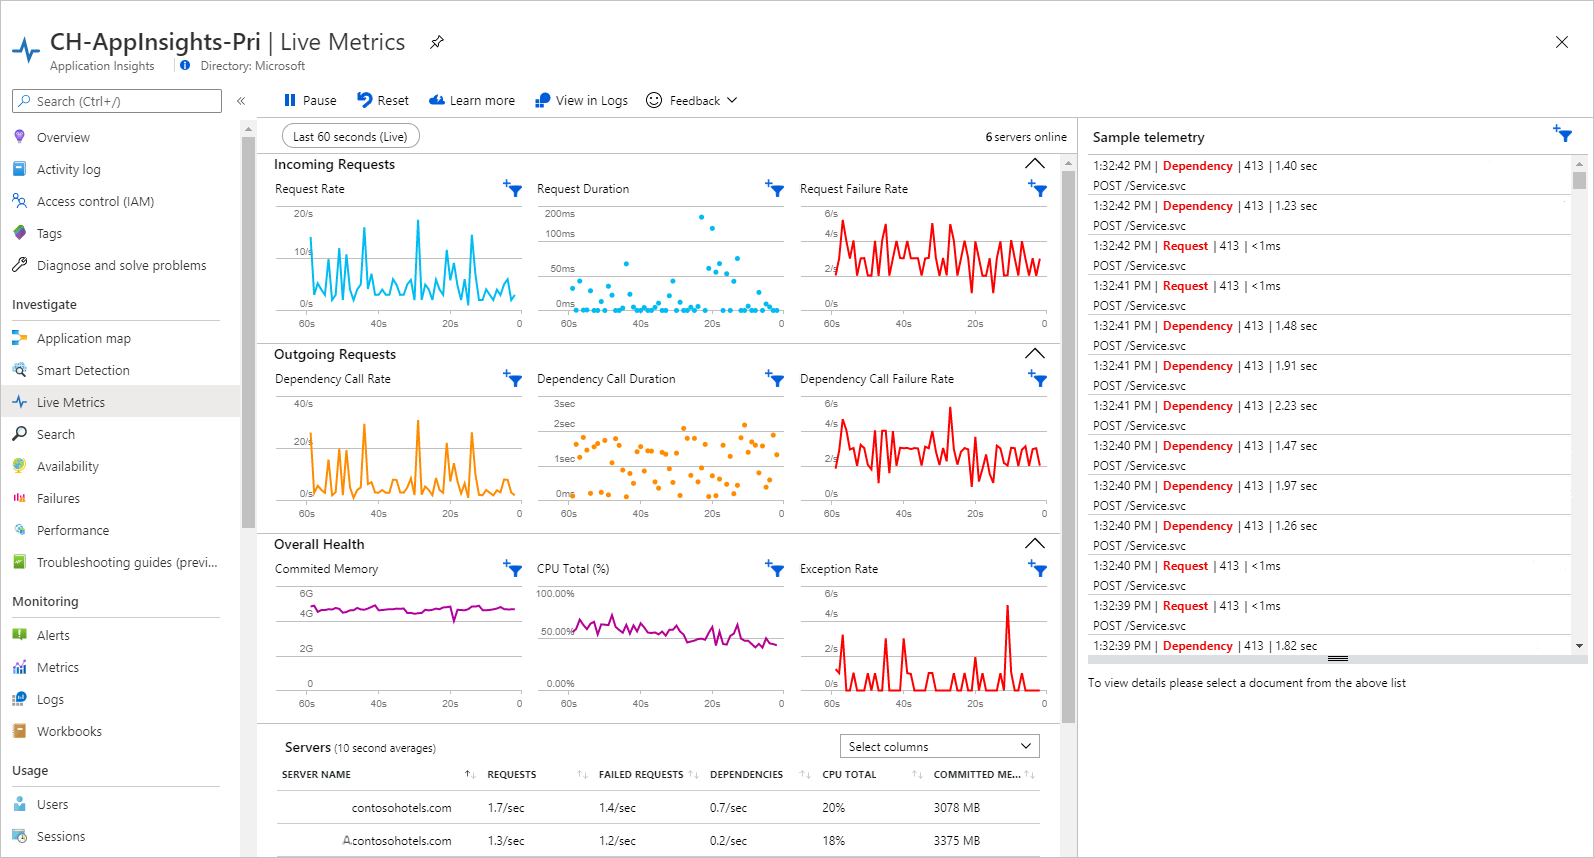

In [8]:
%%question
What are availability tests? How do they work?

**Availability tests** are a feature in **Application Insights** that monitor the **availability** and **responsiveness** of your application by sending web requests to it at regular intervals from various global locations. They help ensure your application is functioning correctly and can alert you if it isn't responding or is too slow. There are several types of availability tests, such as **Standard tests**, **Custom TrackAvailability tests**, and the soon-to-be-retired **URL ping tests**. These tests do not require changes to your website and can also monitor REST APIs.

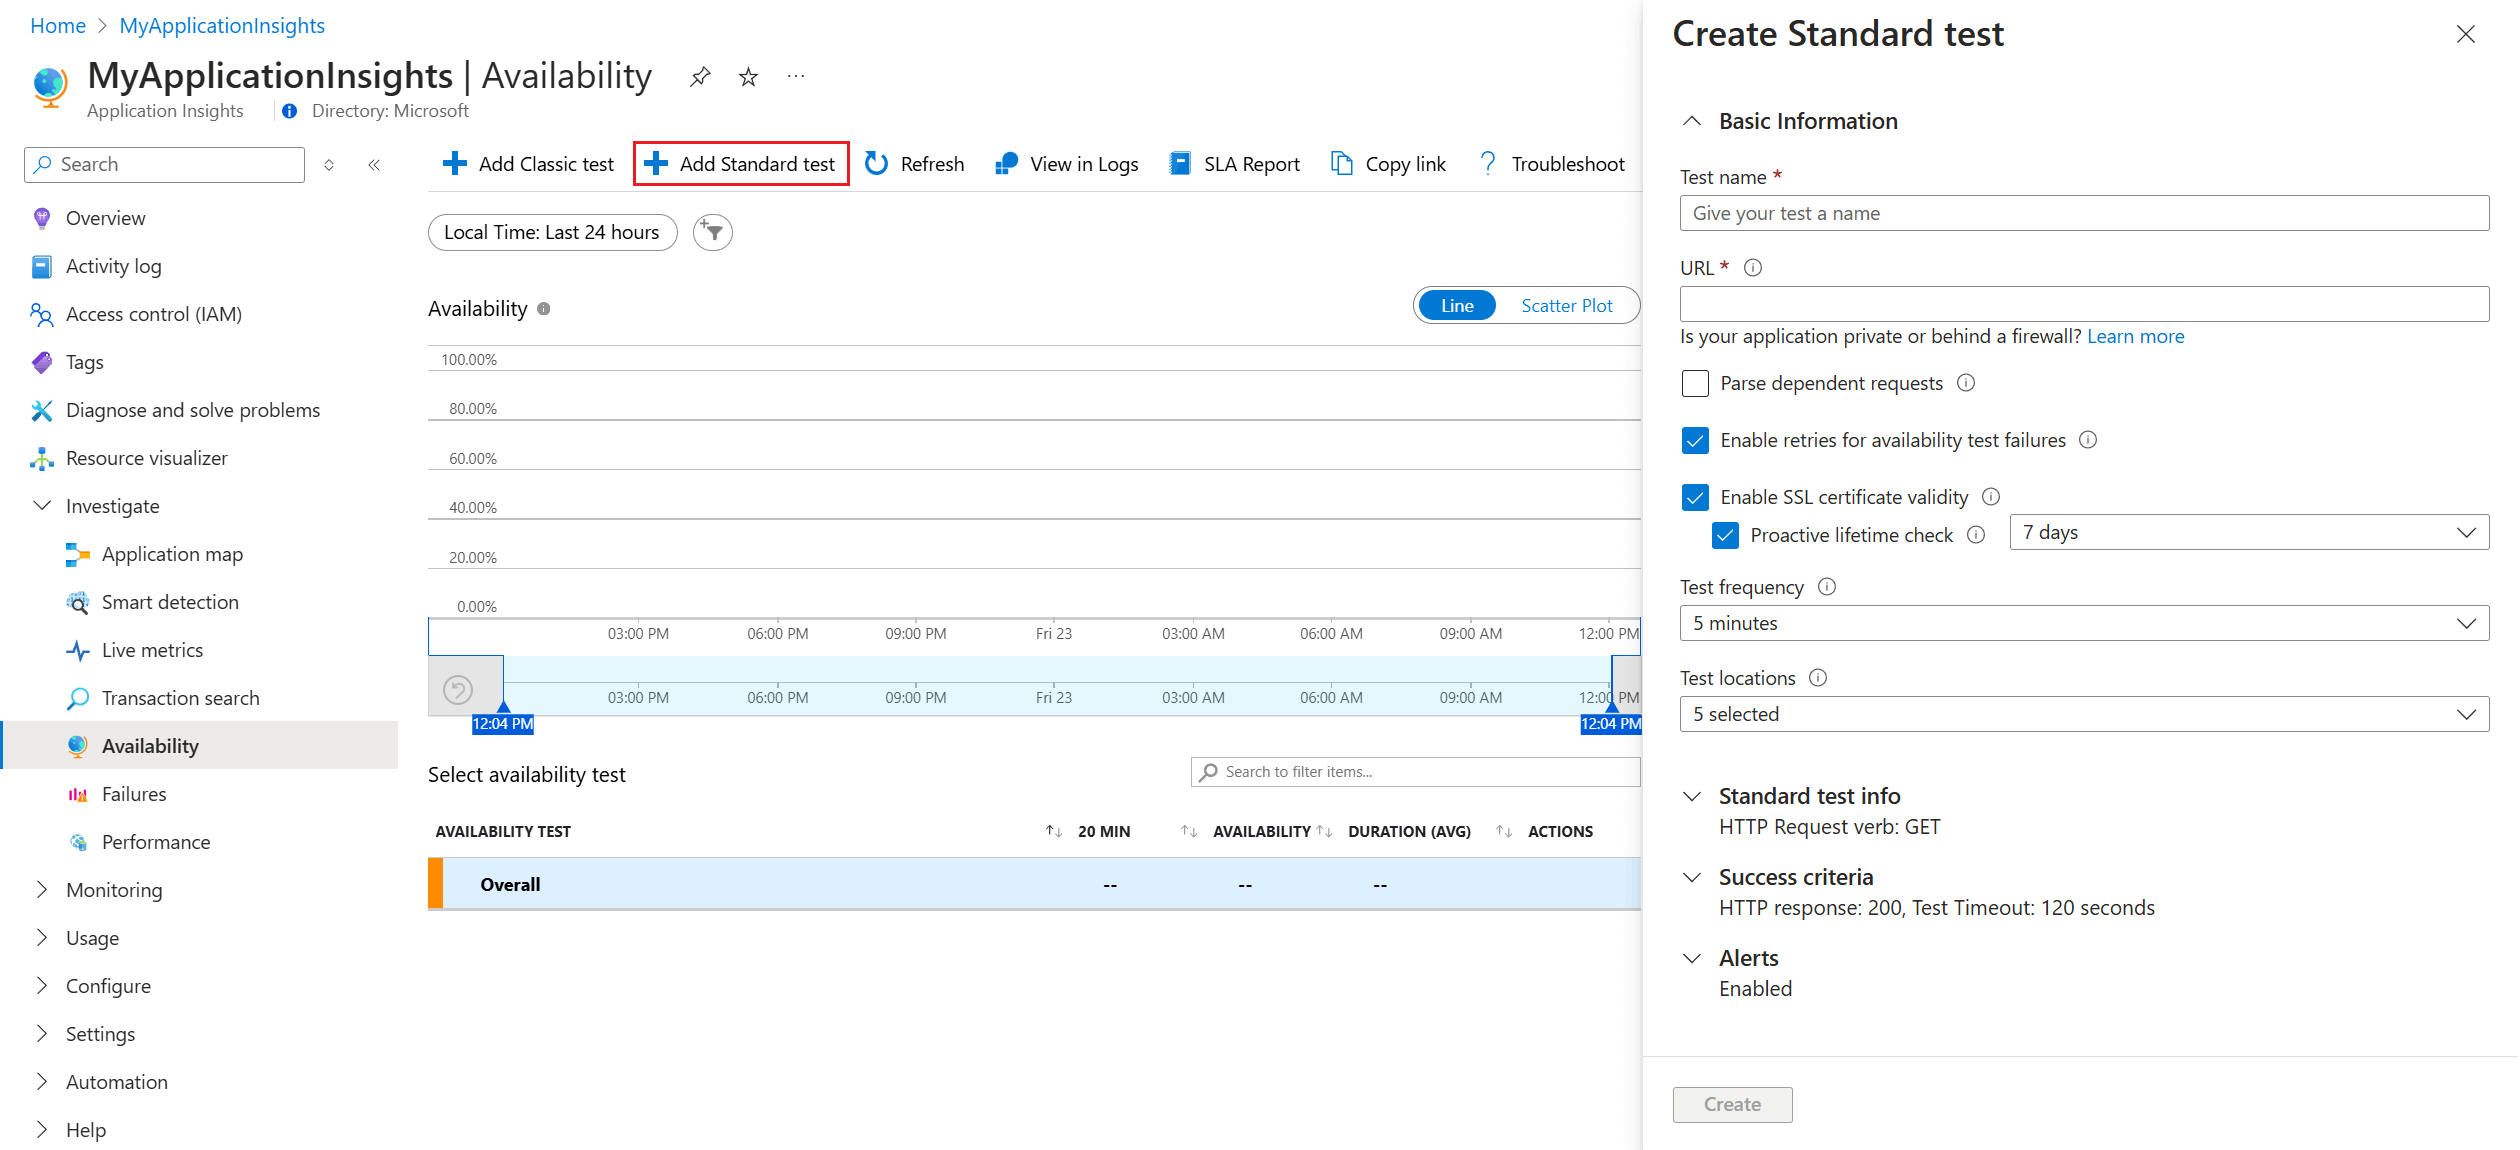

In [9]:
%%question
How do I setup one?

To set up an **availability test** in **Application Insights**, follow these steps:

1. **Navigate to your Application Insights resource** in the Azure Portal.

2. Go to the **"Availability"** section on the left-hand menu.

3. Click on **"Add test"** to start configuring a new availability test.

4. Choose the **test type** (e.g., Standard test).

5. Enter the **URL** of the application or service you want to monitor.

6. Configure additional settings, such as **test frequency**, **locations**, and **success criteria**.

7. Click **"Create"** or **"OK"** to save and start the test.

The test will begin running as per the specified configuration, and you will receive alerts if the application becomes unavailable or does not meet the defined criteria.

In [10]:
%%question 
What is the difference betweeen Standard test or Custom TrackAvailability test?

The **difference** between a **Standard test** and a **Custom TrackAvailability test** is:

- **Standard Test**: 
  - Pre-configured test type available directly in the Azure Portal.
  - Checks the availability of a website by sending a single request.
  - Includes features like TLS/SSL validity, HTTP request verb customization, and custom headers.
  - Requires no coding and is easy to set up.

- **Custom TrackAvailability Test**:
  - Requires creating a custom application to run the test.
  - Developers use the `TrackAvailability()` method to send test results to Application Insights.
  - Offers more flexibility and customization in how the test is executed and data is collected.
  - Ideal for complex scenarios that need specific monitoring logic.

In [11]:
%%question
Can you share a small example of a custom availability test?

Certainly! Here's a simple example of how you might implement a **Custom TrackAvailability test** using C# and the **Application Insights SDK**:

```csharp
using Microsoft.ApplicationInsights;
using Microsoft.ApplicationInsights.DataContracts;
using System;
using System.Net.Http;
using System.Threading.Tasks;

class Program
{
    static async Task Main(string[] args)
    {
        var telemetryClient = new TelemetryClient();

        // Define the test name and URL to check
        string testName = "My Custom Availability Test";
        string url = "https://www.example.com";

        var availabilityTelemetry = new AvailabilityTelemetry
        {
            Name = testName,
            RunLocation = "CustomLocation",
            Success = false, // Assume failure unless proven otherwise
            Context = { Operation = { Id = Guid.NewGuid().ToString() } },
            Timestamp = DateTimeOffset.UtcNow
        };

        try
        {
            using (var httpClient = new HttpClient())
            {
                var response = await httpClient.GetAsync(url);
                availabilityTelemetry.Success = response.IsSuccessStatusCode;
                availabilityTelemetry.Message = $"Response code: {response.StatusCode}";
            }
        }
        catch (Exception ex)
        {
            availabilityTelemetry.Success = false;
            availabilityTelemetry.Message = $"Exception: {ex.Message}";
        }
        finally
        {
            availabilityTelemetry.Duration = DateTimeOffset.UtcNow - availabilityTelemetry.Timestamp;
            telemetryClient.TrackAvailability(availabilityTelemetry);
            telemetryClient.Flush();
        }

        Console.WriteLine("Custom availability test completed.");
    }
}
```

**Explanation**:
- **TelemetryClient**: Used to send telemetry data to Application Insights.
- **AvailabilityTelemetry**: Represents the availability test data structure.
- **HttpClient**: Sends a GET request to the specified URL.
- **Success**: Indicates if the request was successful based on the HTTP response.
- **TrackAvailability**: Sends the telemetry data to Application Insights.

Ensure you have the necessary **Application Insights SDK** packages installed and configured in your project.

In [12]:
%%question
What is distibuted tracing?

**Distributed tracing** is a technique used to follow and visualize the flow of a request or transaction across different components or services in a distributed application. It helps identify performance bottlenecks and trace issues by providing an end-to-end view of how requests are handled. Each segment of the trace represents a unit of work done by a component, allowing developers to see how long each part takes and where potential problems may arise. This is particularly useful in microservices architectures, where a single user request might involve multiple services.

In [13]:
%%question
What information is provided in the Application Map?

The **Application Map** provides a **visual representation** of your application's topology, showing how different components interact. It includes:

- **Nodes**: Represent application components or dependencies.
- **Health Indicators**: Show key performance metrics like request rates, response times, and failure rates.
- **Alerts Status**: Indicate if any alerts are triggered for a component.
- **Dependency Calls**: Visualize calls between components and external services.
- **Performance Insights**: Allow you to drill down into specific components for detailed diagnostics.
- **Azure Service Integrations**: If applicable, provide links to Azure diagnostics, such as SQL Database Advisor recommendations.

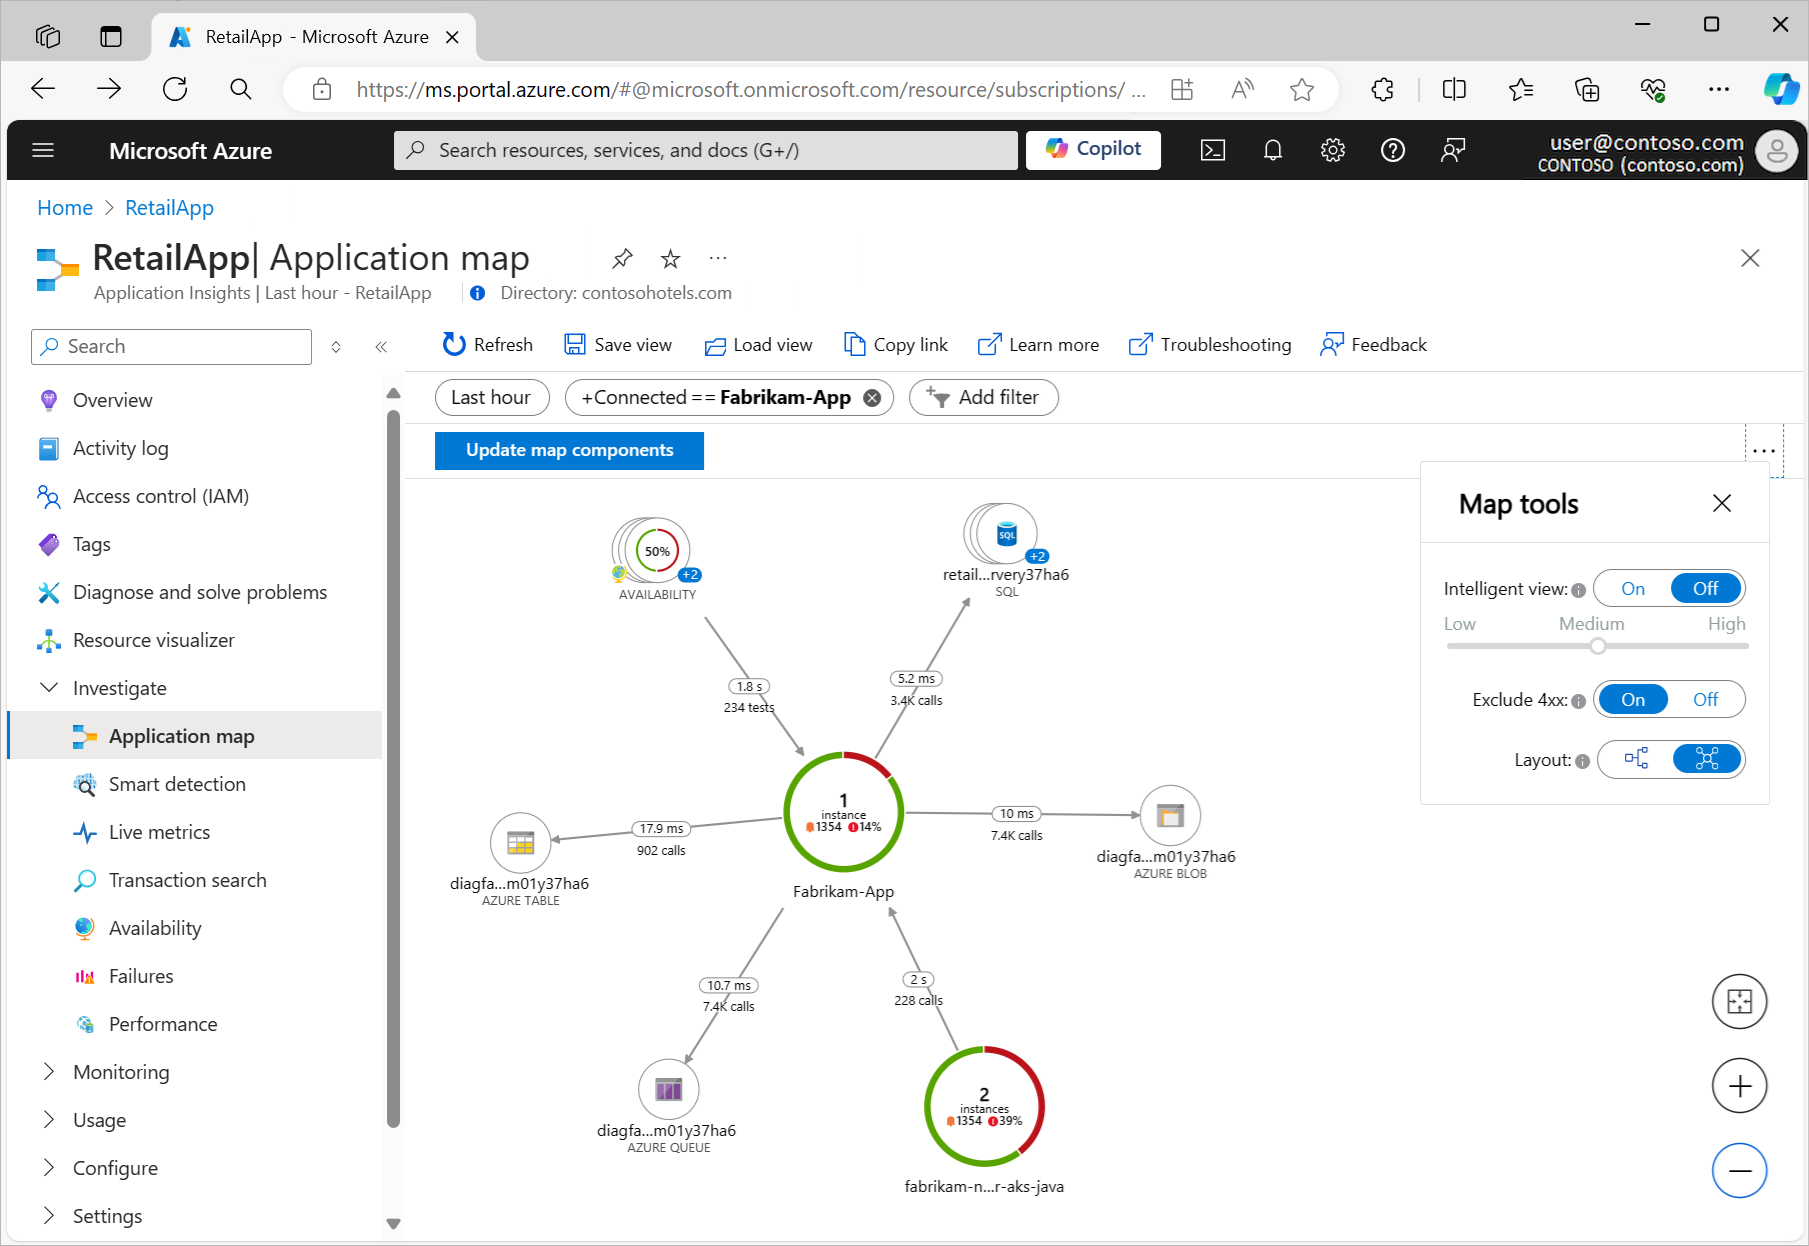

In [16]:
%%question
If my application is running on a virtual machine in AWS, can I still use Application Insights? and will still show the application map correctly?

Yes, you can still use **Application Insights** for applications running on a virtual machine in **AWS**. By installing the **Application Insights SDK** or using **autoinstrumentation**, you can collect telemetry data just as you would on any other platform.

As long as the SDK is correctly integrated and configured, the **Application Map** will display the application's components and dependencies accurately. It visualizes the interactions and provides insights into the application's performance, regardless of whether it's hosted on Azure, AWS, or another environment.

In [15]:
%%question
How does Application Insights collect all of this data?

**Application Insights** collects data using **instrumentation** methods, primarily through:

1. **SDKs**: Libraries integrated into your application code to collect telemetry data, such as requests, dependencies, exceptions, and custom events.

2. **Autoinstrumentation**: Configuration-based telemetry collection without modifying the application code. Available for certain languages and platforms, it automatically tracks requests, dependencies, and other metrics.

3. **Azure Monitor Agents**: Deployed on virtual machines to gather metrics and logs from the operating system and applications.

4. **Availability Tests**: Ping and monitor endpoints to assess availability and responsiveness.

5. **Log Analytics**: Aggregates and queries log data from various sources.

These methods collectively capture a comprehensive view of the application's performance and health.

In [17]:
%%question
Does it automatically collect logs and metrics from my code?

**Application Insights** can automatically collect certain **logs** and **metrics** from your application using **autoinstrumentation** or the SDK, depending on the platform and language support. This includes:

- **HTTP requests** and response times.
- **Dependency calls** to external services.
- **Exceptions** and error logs.
- **Page views** and **AJAX calls** for web applications.

However, for **custom logs** and **specific metrics**, you may need to manually instrument your code to send additional telemetry using the **SDK**. This allows you to track custom events and metrics that are unique to your application's business logic.

In [18]:
%%question
I'm using System.Diagnostics.Trace.WriteLine in my code, will Application Insights collect this data?

Yes, **Application Insights** can collect data from **System.Diagnostics.Trace.WriteLine** calls. You need to configure the Application Insights SDK to capture trace logs. This typically involves setting up a trace listener that directs trace output to Application Insights. Once configured, it will correlate these trace logs with other telemetry data, providing a comprehensive view of your application's behavior.

In [19]:
%%question
What does that configuration look like?

To configure **Application Insights** to collect data from **System.Diagnostics.Trace.WriteLine**, you need to set up a trace listener. Here's a basic example of how you can do this in your application:

1. **Install the Application Insights SDK** for your application if not already done.

2. **Configure the Trace Listener** in your `App.config` or `Web.config` file (for .NET applications):

```xml
<configuration>
  <system.diagnostics>
    <trace>
      <listeners>
        <add name="aiTraceListener" type="Microsoft.ApplicationInsights.TraceListener.ApplicationInsightsTraceListener, Microsoft.ApplicationInsights.TraceListener" />
      </listeners>
    </trace>
  </system.diagnostics>
</configuration>
```

3. **Initialize Application Insights** in your application startup code:

```csharp
using Microsoft.ApplicationInsights.Extensibility;

// Typically in Program.cs or Startup.cs
TelemetryConfiguration configuration = TelemetryConfiguration.CreateDefault();
configuration.InstrumentationKey = "YOUR_INSTRUMENTATION_KEY"; // Replace with your actual key
```

With this configuration, trace messages written using `System.Diagnostics.Trace.WriteLine` will be sent to Application Insights, allowing you to monitor and analyze them alongside other telemetry data.

In [20]:
%%question
How do I configure the Application Insights instrumentation key 

To configure the **Application Insights instrumentation key**, you need to specify it in your application settings. Here's how you can do it for different types of .NET applications:

1. **ASP.NET Core**:

   - Add the instrumentation key to your `appsettings.json` file:

     ```json
     {
       "ApplicationInsights": {
         "InstrumentationKey": "YOUR_INSTRUMENTATION_KEY"
       }
     }
     ```

   - Ensure the Application Insights services are added in `Startup.cs`:

     ```csharp
     public void ConfigureServices(IServiceCollection services)
     {
         services.AddApplicationInsightsTelemetry();
     }
     ```

2. **ASP.NET Framework**:

   - Add the instrumentation key in your `Web.config` file:

     ```xml
     <configuration>
       <applicationInsights>
         <instrumentationKey>YOUR_INSTRUMENTATION_KEY</instrumentationKey>
       </applicationInsights>
     </configuration>
     ```

3. **Console Applications**:

   - Set the instrumentation key in your code:

     ```csharp
     using Microsoft.ApplicationInsights.Extensibility;

     TelemetryConfiguration.Active.InstrumentationKey = "YOUR_INSTRUMENTATION_KEY";
     ```

Replace `"YOUR_INSTRUMENTATION_KEY"` with the actual key from your Application Insights resource. This key uniquely identifies your telemetry data with your Application Insights resource in Azure.

In [21]:
%%question
I'm using OpenTelemetry, can I use Application Insights?

Yes, you can use **Application Insights** with **OpenTelemetry**. OpenTelemetry provides a vendor-neutral way to collect telemetry data, and you can export this data to Application Insights using the appropriate **OpenTelemetry exporters**.

Here's a basic approach:

1. **Set up OpenTelemetry** in your application using the OpenTelemetry SDK.

2. **Configure an exporter** to send telemetry data to Application Insights. Microsoft provides an **OpenTelemetry Exporter for Azure Monitor** that you can use.

3. **Install the necessary NuGet packages** for OpenTelemetry and the Azure Monitor exporter.

4. **Configure the exporter** in your application code:

   ```csharp
   using OpenTelemetry;
   using OpenTelemetry.Trace;
   using OpenTelemetry.Resources;
   using Azure.Monitor.OpenTelemetry.Exporter;

   var tracerProvider = Sdk.CreateTracerProviderBuilder()
       .SetResourceBuilder(ResourceBuilder.CreateDefault().AddService("MyServiceName"))
       .AddAspNetCoreInstrumentation()
       .AddHttpClientInstrumentation()
       .AddAzureMonitorTraceExporter(o => o.ConnectionString = "InstrumentationKey=YOUR_INSTRUMENTATION_KEY")
       .Build();
   ```

Replace `"YOUR_INSTRUMENTATION_KEY"` with your actual Application Insights instrumentation key. This setup will allow you to collect and send trace data to Application Insights using OpenTelemetry.

In [22]:
%%question
How do I instrument the client side of my application in the case a web application, running in the browser?

To instrument the **client-side** of a web application running in the browser with **Application Insights**, you can use the **JavaScript SDK**. Here's how you can do it:

1. **Include the Application Insights JavaScript SDK** in your web pages:

   Add the following script tag to your HTML, ideally in the `<head>` section:

   ```html
   <script type="text/javascript">
     !function(T,l,y){
       var S=T.location,k="script",D="instrumentationKey",C="ingestionendpoint",I="disableExceptionTracking",E="ai.device.",b="toLowerCase",w="crossOrigin",N="POST",e="appInsightsSDK",t=y.name||"appInsights",n=(T[t]||function(d){
       var g={initialize:!0,queue:[],sv:"5",version:2,config:d};function v(e,t){
       g[e]=function(){var i=arguments;g.queue.push(function(){g[e].apply(g,i)})}}var e=l.createElement(k),i=l.getElementsByTagName(k)[0];
       e.src=y.src;for(var s in y)y.hasOwnProperty(s)&&(g[s]=y[s]);i.parentNode.insertBefore(e,i);try{g.cookie=l.cookie}catch(e){}
       for(var o=["Event","Exception","Metric","PageView","Trace","Dependency"];o.length;)v("track"+o.pop());
       return v("setAuthenticatedUserContext"),v("clearAuthenticatedUserContext"),v("startTrackEvent"),v("stopTrackEvent"),
       v("startTrackPage"),v("stopTrackPage"),v("flush"),g
       }(y.cfg));function a(e,t){
       if(e){var n=l.createElement(k);n.src=e,n.async=!0,n[w]=t||"anonymous";
       var i=l.getElementsByTagName(k)[0];i.parentNode.insertBefore(n,i)}
       }a(S.pathname.indexOf("/ai.0.js")>-1?"":"https://js.monitor.azure.com/scripts/b/ai.2.min.js",y[w]);
       try{n.cookie=l.cookie}catch(e){}
       }
       (window,document,{
         src: "https://js.monitor.azure.com/scripts/b/ai.2.min.js",
         cfg: {
           instrumentationKey: "YOUR_INSTRUMENTATION_KEY",
           enableCorsCorrelation: true,
           enableAutoRouteTracking: true
         }
       });
     </script>
   ```

   Replace `"YOUR_INSTRUMENTATION_KEY"` with your actual Application Insights instrumentation key.

2. **Track Page Views and Events**:

   The SDK automatically tracks page views. For custom events or additional telemetry, use the `appInsights` object:

   ```javascript
   appInsights.trackEvent({ name: 'myCustomEvent', properties: { key1: 'value1', key2: 'value2' } });
   ```

3. **Customize the Configuration**:

   You can customize settings like `enableCorsCorrelation`, `enableAutoRouteTracking`, and others in the `cfg` object to suit your needs.

By integrating the JavaScript SDK, you can monitor client-side performance, track user interactions, and gain insights into how users are experiencing your web application.